In [41]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

In [42]:
data = pd.read_csv("../data/housing.csv")

In [43]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [44]:
#check if we can null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [45]:
#remove nulls
data.dropna(inplace=True)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [47]:
#split data

from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1)
y= data['median_house_value']

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [49]:
train_data= x_train.join(y_train)

In [50]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
3961,-118.56,34.20,35.0,1770.0,362.0,1083.0,355.0,5.0483,<1H OCEAN,221000.0
4353,-118.38,34.10,39.0,3798.0,586.0,975.0,525.0,9.3092,<1H OCEAN,500001.0
11830,-120.87,39.15,17.0,1819.0,389.0,736.0,283.0,2.8603,INLAND,128900.0
15669,-122.44,37.80,52.0,1580.0,470.0,714.0,448.0,3.2447,NEAR BAY,500001.0
10822,-117.91,33.65,24.0,1494.0,494.0,814.0,459.0,2.1074,<1H OCEAN,181300.0
...,...,...,...,...,...,...,...,...,...,...
15516,-117.08,33.16,11.0,6341.0,1030.0,2697.0,977.0,4.8554,<1H OCEAN,206700.0
16358,-121.29,38.00,12.0,4038.0,1074.0,3440.0,942.0,1.9698,INLAND,112300.0
17076,-122.20,37.48,32.0,640.0,166.0,991.0,160.0,1.9844,NEAR BAY,270000.0
19349,-123.01,38.67,33.0,914.0,147.0,394.0,132.0,4.6875,<1H OCEAN,246200.0


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

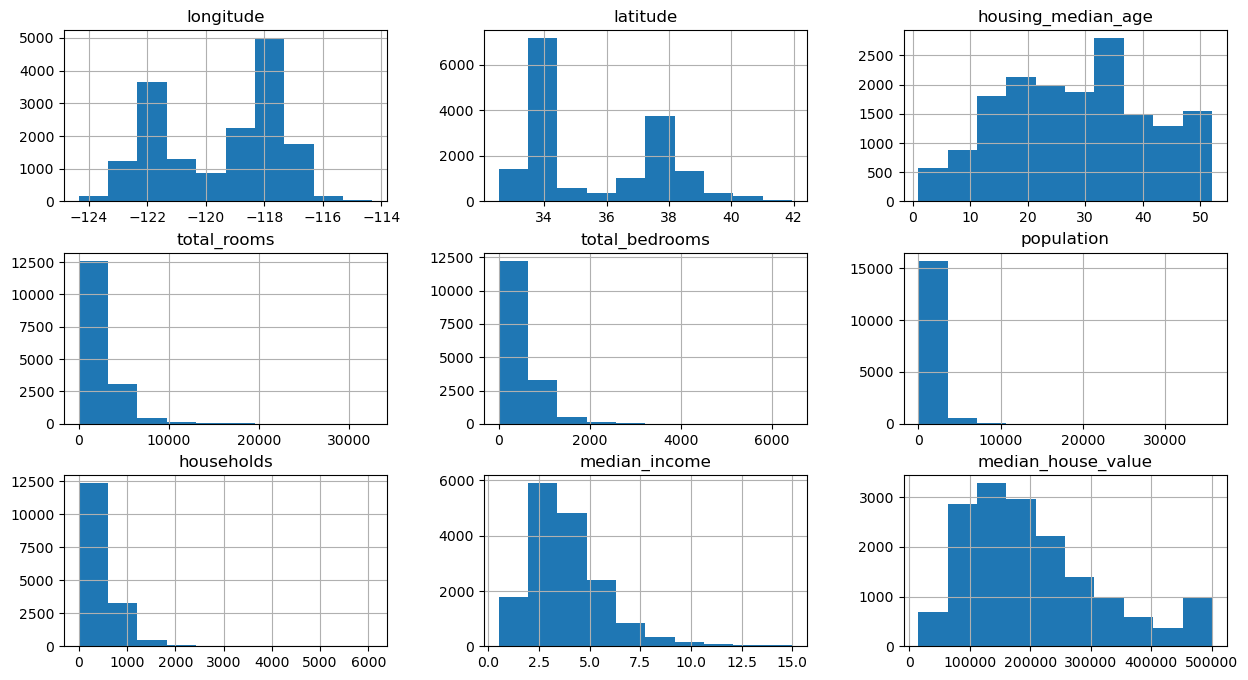

In [51]:
train_data.hist(figsize=(15,8))

<AxesSubplot:>

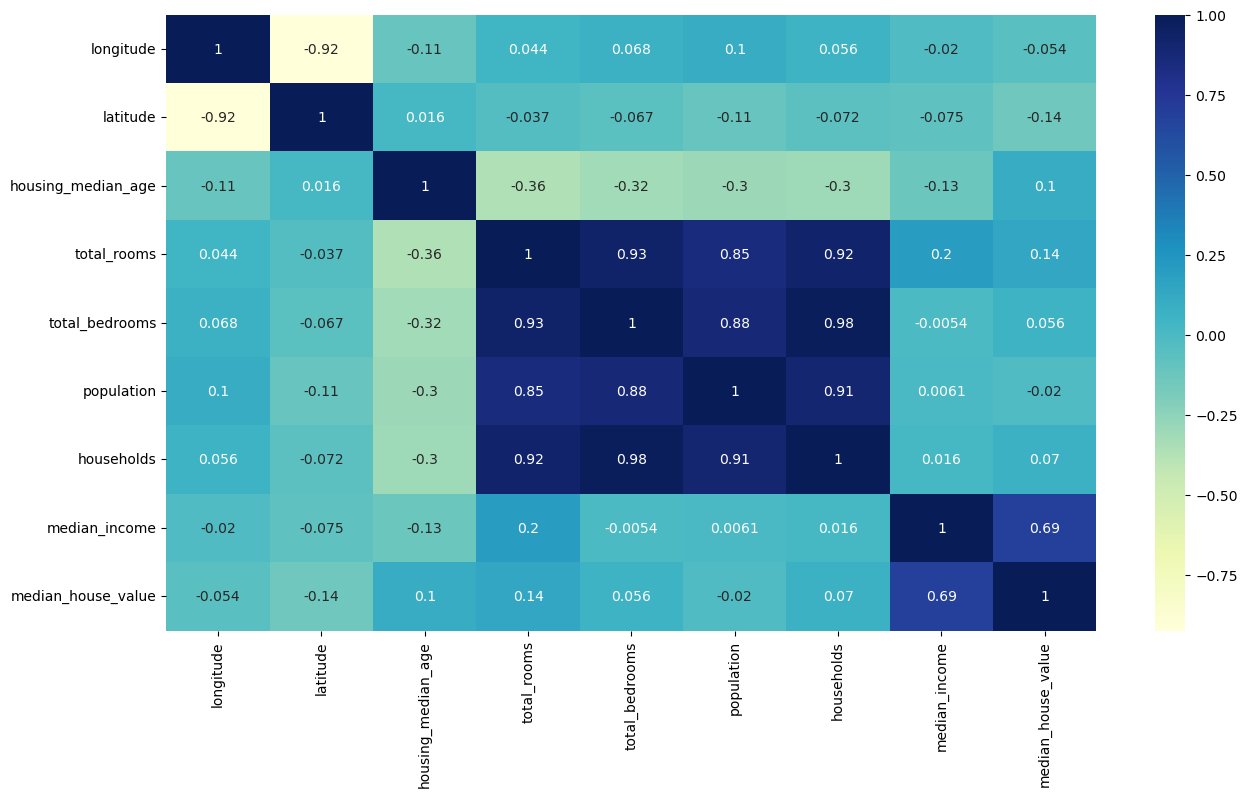

In [52]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

In [53]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

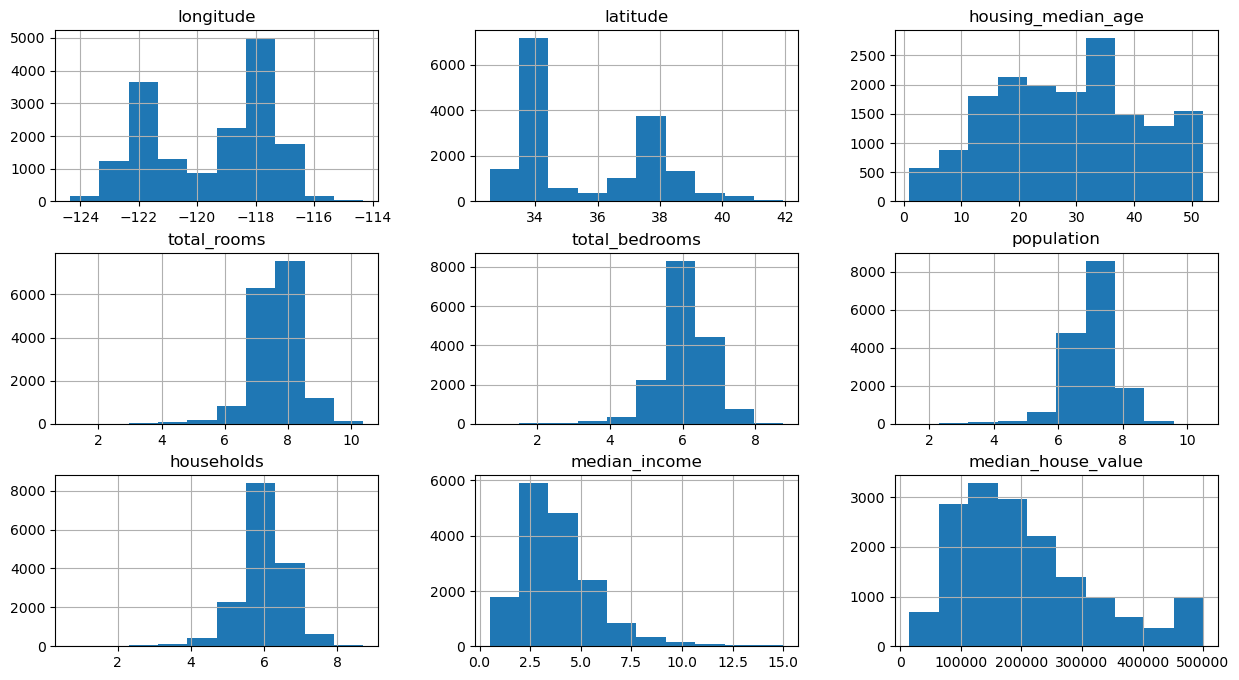

In [54]:
train_data.hist(figsize=(15,8))

In [55]:
#check how many category is inside ocean_proximity
train_data.ocean_proximity.value_counts()

<1H OCEAN     7225
INLAND        5165
NEAR OCEAN    2118
NEAR BAY      1834
ISLAND           4
Name: ocean_proximity, dtype: int64

In [56]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis= 1)

In [57]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
3961,-118.56,34.20,35.0,7.479300,5.894403,6.988413,5.874931,5.0483,221000.0,1,0,0,0,0
4353,-118.38,34.10,39.0,8.242493,6.375025,6.883463,6.265301,9.3092,500001.0,1,0,0,0,0
11830,-120.87,39.15,17.0,7.506592,5.966147,6.602588,5.648974,2.8603,128900.0,0,1,0,0,0
15669,-122.44,37.80,52.0,7.365813,6.154858,6.572283,6.107023,3.2447,500001.0,0,0,0,1,0
10822,-117.91,33.65,24.0,7.309881,6.204558,6.703188,6.131226,2.1074,181300.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15516,-117.08,33.16,11.0,8.754949,6.938284,7.900266,6.885510,4.8554,206700.0,1,0,0,0,0
16358,-121.29,38.00,12.0,8.303752,6.980076,8.143517,6.849066,1.9698,112300.0,0,1,0,0,0
17076,-122.20,37.48,32.0,6.463029,5.117994,6.899723,5.081404,1.9844,270000.0,0,0,0,1,0
19349,-123.01,38.67,33.0,6.818924,4.997212,5.978886,4.890349,4.6875,246200.0,1,0,0,0,0


<AxesSubplot:>

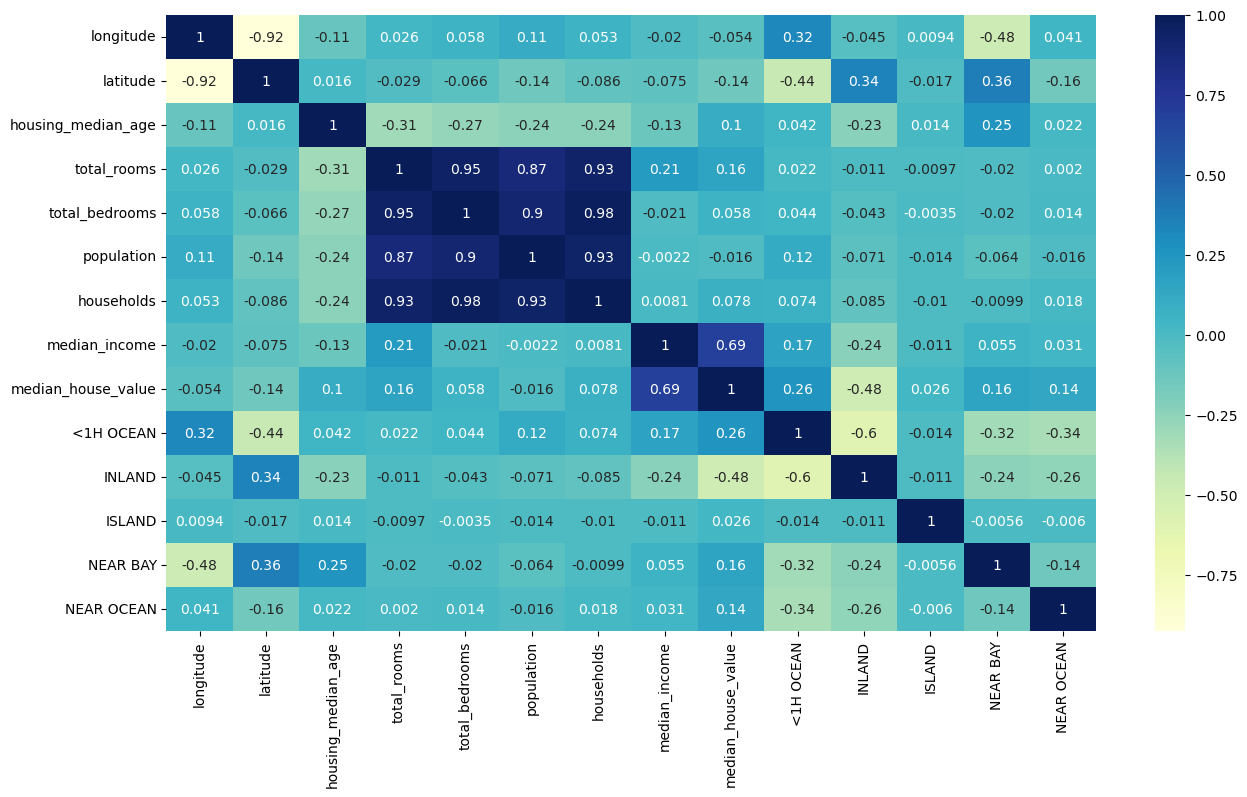

In [58]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

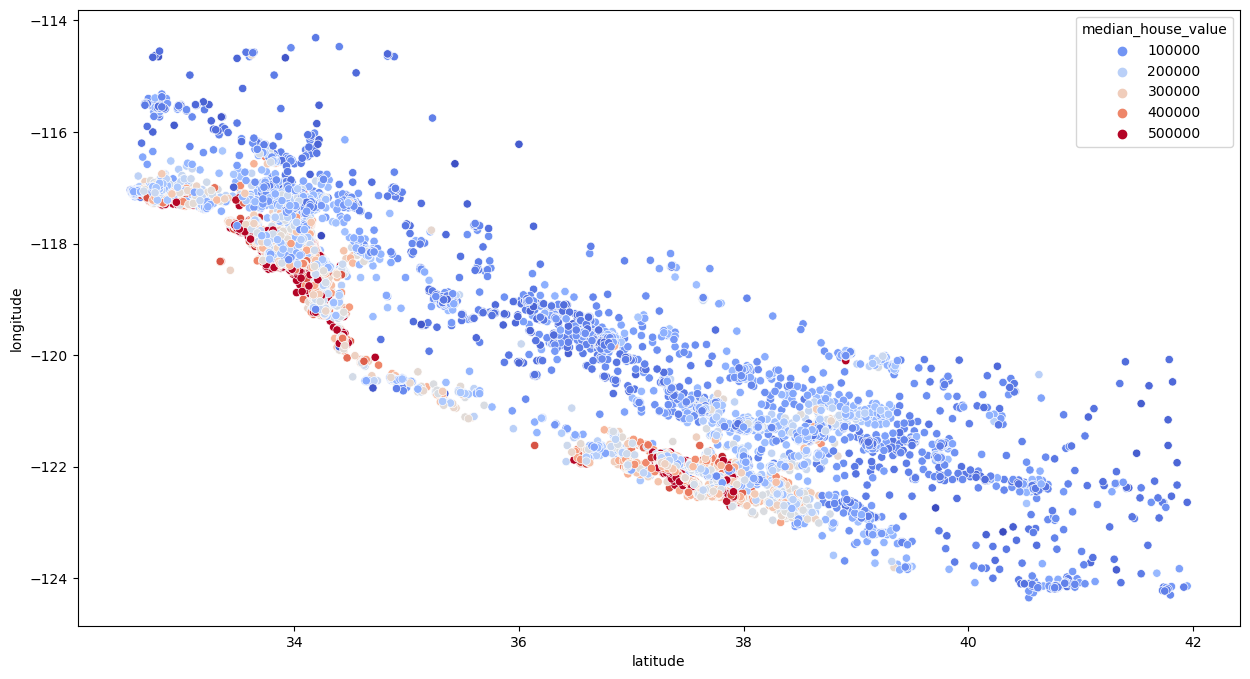

In [59]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data= train_data, hue="median_house_value", palette="coolwarm")

** Feature engineering**

In [60]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<AxesSubplot:>

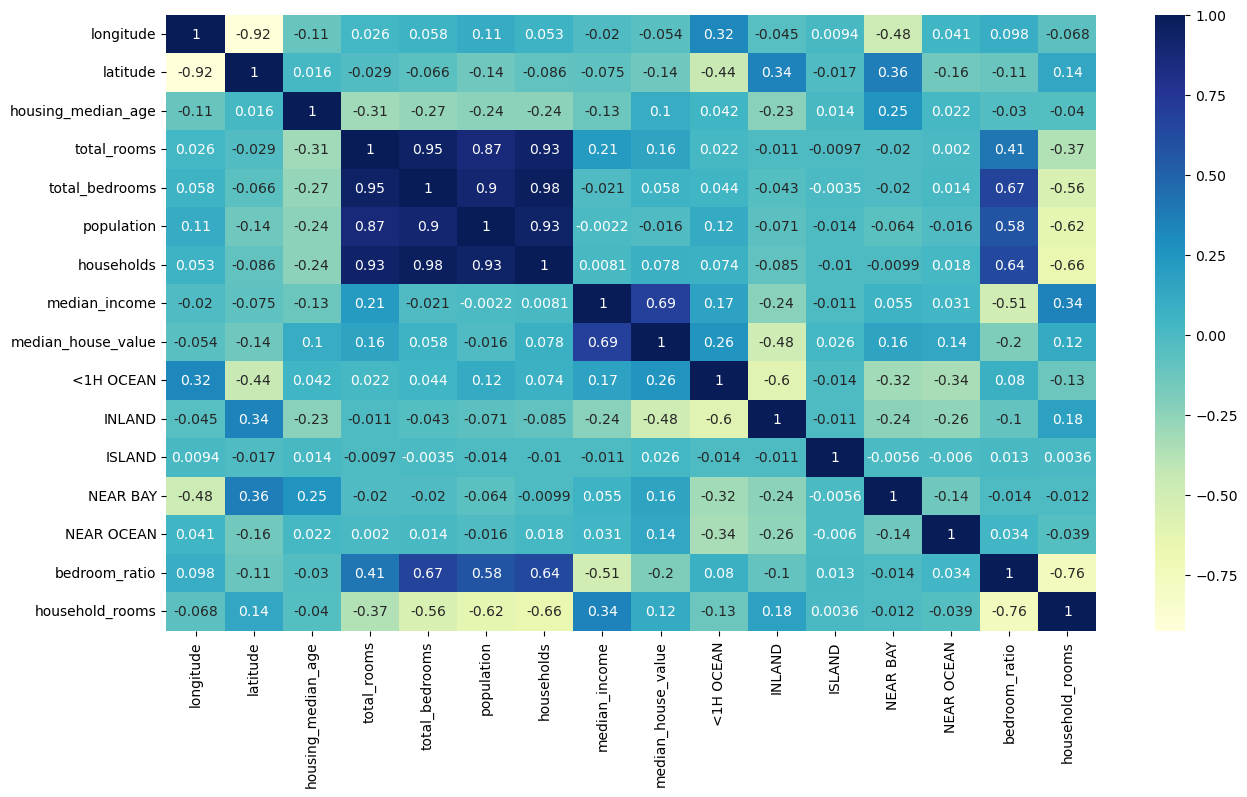

In [61]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

In [62]:
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
reg= LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [63]:
test_data= x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis= 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

In [64]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [65]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
3961,-118.56,34.20,35.0,7.479300,5.894403,6.988413,5.874931,5.0483,221000.0,1,0,0,0,0,0.788096,1.273087
4353,-118.38,34.10,39.0,8.242493,6.375025,6.883463,6.265301,9.3092,500001.0,1,0,0,0,0,0.773434,1.315578
11830,-120.87,39.15,17.0,7.506592,5.966147,6.602588,5.648974,2.8603,128900.0,0,1,0,0,0,0.794788,1.328842
15669,-122.44,37.80,52.0,7.365813,6.154858,6.572283,6.107023,3.2447,500001.0,0,0,0,1,0,0.835598,1.206122
10822,-117.91,33.65,24.0,7.309881,6.204558,6.703188,6.131226,2.1074,181300.0,1,0,0,0,0,0.848790,1.192238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15516,-117.08,33.16,11.0,8.754949,6.938284,7.900266,6.885510,4.8554,206700.0,1,0,0,0,0,0.792499,1.271503
16358,-121.29,38.00,12.0,8.303752,6.980076,8.143517,6.849066,1.9698,112300.0,0,1,0,0,0,0.840593,1.212392
17076,-122.20,37.48,32.0,6.463029,5.117994,6.899723,5.081404,1.9844,270000.0,0,0,0,1,0,0.791888,1.271898
19349,-123.01,38.67,33.0,6.818924,4.997212,5.978886,4.890349,4.6875,246200.0,1,0,0,0,0,0.732845,1.394363


In [66]:
reg.score(x_test,y_test)

0.6622469231970899